<h4>This dataset presents a list of the 100 most streamed songs on Spotify of all time</h4>
(This analysis dates from March 8th 2023)  


Dataset source: https://www.kaggle.com/datasets/amaanansari09/most-streamed-songs-all-time




<h4>Features description:</h4>

- <b>duration:</b> Duration of the song (minutes).


- <b>energy:</b> A perceptual measure of intensity and activity.


- <b>key:</b> The harmony key, being 0 = C, 1 = C#, ... , 11 = B


- <b>loudness:</b> The overall loudness of a track in decibels (dB).


- <b>mode:</b> 0 = Major Key; 1 = Minor Key;


- <b>speechiness:</b> ?


- <b>acousticness:</b> ?


- <b>instrumentalness:</b> ?


- <b>liveness:</b> ?


- <b>valence:</b> ?


- <b>tempo:</b> Rhythm of the song (beats/min or bpm)


- <b>danceability:</b> ?






In [219]:
import os
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import date
from dateutil.parser import parse

In [220]:
features_file_path = f"/Users/sandrolobao/Desktop/Python Projects/Streamed Songs Spotify/streamed songs spotify/Features.csv"

streams_file_path = f"/Users/sandrolobao/Desktop/Python Projects/Streamed Songs Spotify/streamed songs spotify/Streams.csv"

In [221]:
df_features = pd.read_csv(features_file_path)
df_streams = pd.read_csv(streams_file_path)

df_merge = pd.merge(left=df_streams, left_on="Song", right=df_features, right_on="name")

df_merge = df_merge[["Song", "Artist", "Streams (Billions)", "Release Date", "duration", "energy", "key", "mode", "loudness", "tempo"]]

df_merge.head()

,Song,Artist,Streams (Billions),Release Date,duration,energy,key,mode,loudness,tempo
0,Blinding Lights,The Weeknd,3.449,29-Nov-19,3.33,0.730,1,1,-5.934,171.005
1,Shape of You,Ed Sheeran,3.398,06-Jan-17,3.90,0.652,1,0,-3.183,95.977
2,Dance Monkey,Tones And I,2.770,10-May-19,3.49,0.588,6,0,-6.400,98.027
3,Someone You Loved,Lewis Capaldi,2.680,08-Nov-18,3.04,0.405,1,1,-5.679,109.891
4,Rockstar,Post Malone featuring 21 Savage,2.620,15-Sep-17,3.64,0.520,5,0,-6.136,159.801


In [222]:
todays_date = date(2023, 3, 8)
df_merge.insert(4, "Today", todays_date)
df_merge['Release Date'] = df_merge['Release Date'].astype('string')
df_merge['Release Date'] = df_merge['Release Date'].apply(lambda x: parse(x).date())
df_merge['Aging in Days'] = df_merge['Today'] - df_merge['Release Date']
df_merge.head()

,Song,Artist,Streams (Billions),Release Date,Today,duration,energy,key,mode,loudness,tempo,Aging in Days
0,Blinding Lights,The Weeknd,3.449,2019-11-29,2023-03-08,3.33,0.730,1,1,-5.934,171.005,1195 days
1,Shape of You,Ed Sheeran,3.398,2017-01-06,2023-03-08,3.90,0.652,1,0,-3.183,95.977,2252 days
2,Dance Monkey,Tones And I,2.770,2019-05-10,2023-03-08,3.49,0.588,6,0,-6.400,98.027,1398 days
3,Someone You Loved,Lewis Capaldi,2.680,2018-11-08,2023-03-08,3.04,0.405,1,1,-5.679,109.891,1581 days
4,Rockstar,Post Malone featuring 21 Savage,2.620,2017-09-15,2023-03-08,3.64,0.520,5,0,-6.136,159.801,2000 days


In [223]:
df_merge['Aging in Days'] = df_merge['Aging in Days'].dt.total_seconds() / (60*60*24)
df_merge.head()

,Song,Artist,Streams (Billions),Release Date,Today,duration,energy,key,mode,loudness,tempo,Aging in Days
0,Blinding Lights,The Weeknd,3.449,2019-11-29,2023-03-08,3.33,0.730,1,1,-5.934,171.005,1195.0
1,Shape of You,Ed Sheeran,3.398,2017-01-06,2023-03-08,3.90,0.652,1,0,-3.183,95.977,2252.0
2,Dance Monkey,Tones And I,2.770,2019-05-10,2023-03-08,3.49,0.588,6,0,-6.400,98.027,1398.0
3,Someone You Loved,Lewis Capaldi,2.680,2018-11-08,2023-03-08,3.04,0.405,1,1,-5.679,109.891,1581.0
4,Rockstar,Post Malone featuring 21 Savage,2.620,2017-09-15,2023-03-08,3.64,0.520,5,0,-6.136,159.801,2000.0


<AxesSubplot:xlabel='Aging in Days', ylabel='Streams (Billions)'>

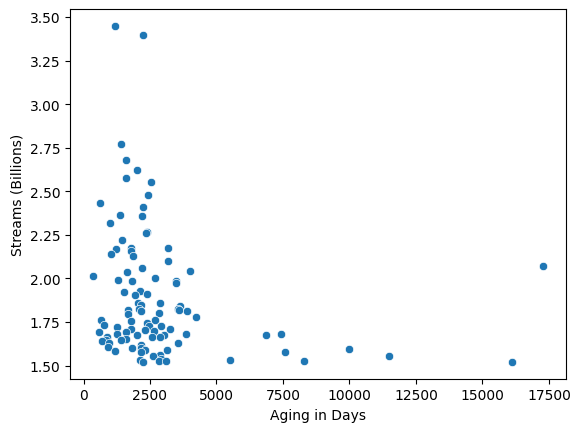

In [224]:
sb.scatterplot(y='Streams (Billions)', x='Aging in Days', data=df_merge)

<AxesSubplot:xlabel='duration', ylabel='Streams (Billions)'>

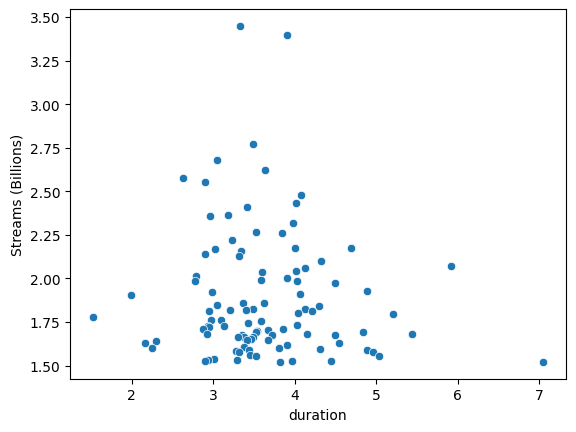

In [231]:
sb.scatterplot(y='Streams (Billions)', x='duration', data=df_merge)

In [225]:
df_merge.nunique()

Song                  100
Artist                 81
Streams (Billions)     94
Release Date           97
Today                   1
duration               84
energy                 94
key                    12
mode                    2
loudness               99
tempo                  99
Aging in Days          97
dtype: int64

In [226]:
artistOccurrences = df_merge['Artist'].value_counts()
artistOccurrences

Ed Sheeran                               4
Shawn Mendes                             3
Imagine Dragons                          3
XXXTentacion                             3
The Weeknd                               2
                                        ..
Camila Cabello featuring Young Thug      1
Travis Scott featuring Kendrick Lamar    1
John Legend                              1
Hozier                                   1
Luis Fonsi featuring Daddy Yankee        1
Name: Artist, Length: 81, dtype: int64

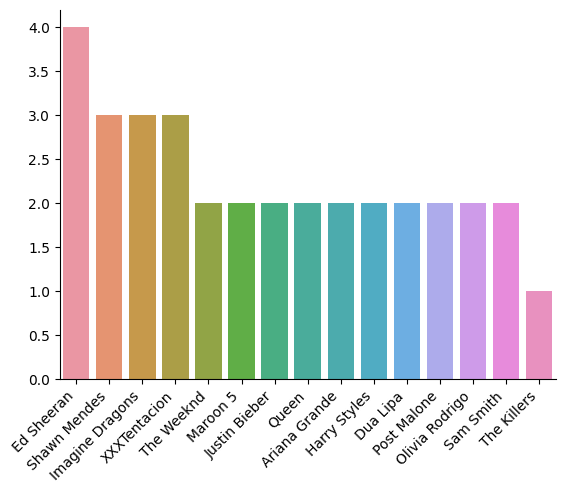

In [230]:
barplot_1 = sb.barplot(x=artistOccurrences.index[:15], y=artistOccurrences.values[:15])

barplot_1.set_xticklabels(barplot_1.get_xticklabels(), rotation=45, ha='right')

sb.despine()